# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stt
from IPython.display import YouTubeVideo
from sklearn.linear_model import LinearRegression

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

In [3]:
PATH = "./data/"
PATH_SALARIES = "baseballdatabank-2023/contrib/Salaries.csv"
PATH_DATASET_TASK2 = "dataset-task-2.csv"

data1 = pd.read_csv(PATH+PATH_SALARIES)
data2 = pd.read_csv(PATH+PATH_DATASET_TASK2)
display(data1)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [4]:
# Creation of the three dataframes
PATH = "data/baseballdatabank-2023/"

people_df = pd.read_csv(PATH + "core/People.csv")
salaries_df = pd.read_csv(PATH + "contrib/Salaries.csv")
pitching_df = pd.read_csv(PATH + "core/Pitching.csv")

# Only keeping the lines where years are before 2010
salaries_df = salaries_df[salaries_df.yearID<=2010].copy(deep=True)
pitching_df = pitching_df[pitching_df.yearID<=2010].copy(deep=True)

# Only keeping the first occurences of each player's salary
salaries_df = salaries_df.drop_duplicates(subset=["playerID","yearID"], keep="first").copy(deep=True)

# Size of each dataframe
print(f"The size of people_df is {people_df.shape}.\n")
print(f"The size of salaries_df is {salaries_df.shape}.\n")
print(f"The size of pitching_df is {pitching_df.shape}.\n")

The size of people_df is (20676, 24).

The size of salaries_df is (21351, 5).

The size of pitching_df is (40433, 30).



**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [5]:
# Filter non "L" or "R" throws
people_df = people_df.query('throws in ["L","R"]').copy(deep=True)
display(people_df)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20672,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20673,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20674,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In order to merge the two tables, we assumed to that "playerID" in the `People` dataframe corresponds to "playerID" in the `Pitching` dataframe and that for both it corresponds to a single row. This is consistent with the `readme.txt` file.

In [6]:
# Merge of people_df and pitching_df
pitching_people_df = pd.merge(pitching_df,people_df,how='left',on="playerID")
display(pitching_people_df)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,Brainard,Asahel,150.0,68.0,NaN,R,1871-05-05,1874-10-14,braia102,brainas01
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,Ferguson,Robert Vavasour,149.0,69.0,B,R,1871-05-18,1884-07-01,fergb101,fergubo01
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,Fisher,William Charles,164.0,69.0,R,R,1871-05-06,1878-07-09,fishc102,fishech01
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

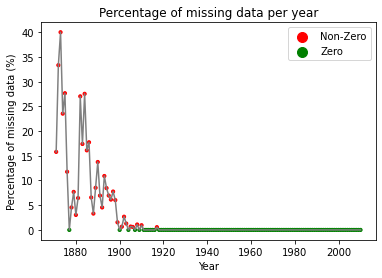

In 1892, the percentage of missing data is 4.55 %.


In [7]:
## Creation of a dataframe with percentage of missing information in the 'throws' column aggregated by year
# Step 1 : grouping data by 'yearID'
# Step 2 : transforming NaN in 1 and others in 0
# Step 3 : averaging to have the fraction of NaN in the considered group
# Step 4 : multiplying by 100 to get percentages
throws_stat = pd.DataFrame(pitching_people_df.groupby(["yearID"])\
    .apply(lambda x: x.throws.isna()))\
    .groupby(["yearID"]).mean()
throws_stat = throws_stat*100
percentages = throws_stat.throws

# Plot
colors = ['green' if p==0 else 'red' for p in percentages]
plt.scatter(throws_stat.index, percentages, c=colors, marker='o',s=10) # red and green points
plt.plot(throws_stat.index, percentages, linestyle='-', color='gray')  # grey line between them

# Legend
red_point = plt.scatter([], [], c='red', marker='o', s=100, label='Non-Zero')
green_point = plt.scatter([], [], c='green', marker='o', s=100, label='Zero')
plt.legend(handles=[red_point, green_point], loc='upper right')
plt.title('Percentage of missing data per year')
plt.ylabel('Percentage of missing data (%)')
plt.xlabel('Year')
plt.show()

# Print of statistics for year 1892 (two digits after the decimal point)
year = 1892
print(f"In {year}, the percentage of missing data is {round(throws_stat.loc[year].iloc[0], 2)} %.")

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [8]:
# Filter on year
salaries_df = salaries_df[salaries_df.yearID>=1920].copy(deep=True)
pitching_people_df = pitching_people_df[pitching_people_df.yearID>=1920].copy(deep=True)

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

For the below merging, we assume that a row in `Salaries` dataframe could be identified by the tuple ["playerID", "yearID"] and hence we merge the two tables based on this tuple. This is consistent with the `readme.txt` file.

In [9]:
# Merge of pitching, people and salary dataframes
pps_df = pd.merge(pitching_people_df,salaries_df[["playerID","yearID","salary"]],
                  how="left",on=["playerID","yearID"])
display(pps_df)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


We group our data by years with groupby and then we computed the mean on each of these subgroups.

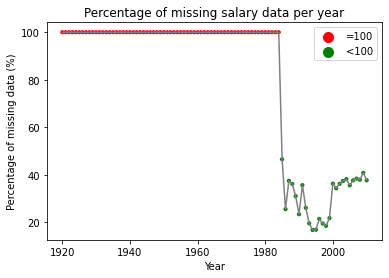

In 2002, the percentage of missing salary data is 36.27 %.


In [10]:
# Creation of a dataframe with percentage of missing information in the 'throws' column aggregated by year
# See 1.4 for details
salary_stat = pd.DataFrame(pps_df[["yearID","salary"]].groupby(["yearID"])\
                           .apply(lambda x: x.salary.isna())).groupby(["yearID"]).mean()
salary_stat = salary_stat*100
percentages = salary_stat.salary

# Plot
colors = ['red' if p==100 else 'green' for p in percentages]
plt.scatter(percentages.index, percentages, c=colors, marker='o',s=10) # red and green points
plt.plot(percentages, linestyle='-', color='gray')  # grey line between them

# Legend
red_point = plt.scatter([], [], c='red', marker='o', s=100, label='=100')
green_point = plt.scatter([], [], c='green', marker='o', s=100, label='<100')
plt.legend(handles=[red_point, green_point], loc='upper right')
plt.title('Percentage of missing salary data per year')
plt.ylabel('Percentage of missing data (%)')
plt.xlabel('Year')
plt.show()

# Print of statistics for year 2002 (with two digits after the decimal point)
year = 2002
print(f"In {year}, the percentage of missing salary data is {round(salary_stat.loc[year].iloc[0], 2)} %.")

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [11]:
# Search of the first and last year where salaries exist
first_year = pps_df[["yearID","salary"]].dropna().yearID.min()
last_year = pps_df[["yearID","salary"]].dropna().yearID.max()
print(f"The interval of years where we have salary data is [{first_year},{last_year}].")

# Filter on the year
pps_df = pps_df.query(f'{first_year} <= yearID <= {last_year}').copy(deep=True)
display(pps_df)

The interval of years where we have salary data is [1985,2010].


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,Johnny Ray,185.0,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,Richard Warren,195.0,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [12]:
# PROVIDED CODE
df = pd.read_csv("./data/dataset-task-2.csv")
display(df)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,beimejo01,2007,1,LAN,NL,4,2,83,0,0,...,Joseph Ronald,205.0,75.0,L,L,2001-04-08,2015-10-03,beimj001,beimejo01,912500.0
14982,wellsda01,2004,1,SDN,NL,12,8,31,31,0,...,David Lee,187.0,75.0,L,L,1987-06-30,2007-09-28,welld001,wellsda01,1250000.0
14983,ridgwje01,2007,1,TBA,AL,0,0,3,0,0,...,Jeffrey Allen,210.0,75.0,R,L,2007-09-17,2008-09-13,ridgj001,ridgwje01,NaN
14984,leiteal01,1994,1,TOR,AL,6,7,20,20,1,...,Alois Terry,200.0,74.0,L,L,1987-09-15,2005-10-02,leita001,leiteal01,565000.0


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

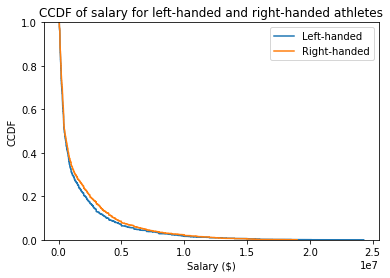

In [13]:
# Creation of separated dataframes depending on the handedness
df_L = df[df.throws == "L"]
df_R = df[df.throws == "R"]

# List of labels for plot legends (useful to unify legends)
HANDEDNESS_LABEL = ['Left-handed','Right-handed']

# Dictionnary containing {values of "throws" column : corresponding HANDEDNESS_LABEL index}
# (useful in questions 3.3 and 3.5)
DICT = {'L':0, 'R':1}

# Plot of CCFD of salary thanks to the ecdf function of sns
sns.ecdfplot(df_L.salary,complementary = True)
sns.ecdfplot(df_R.salary,complementary = True)
plt.title('CCDF of salary for left-handed and right-handed athletes')
plt.xlabel('Salary ($)')
plt.ylabel('CCDF')
plt.legend(labels = HANDEDNESS_LABEL)
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

The figure is too flattened, and we cannot see what is happening for low and high salaries.
Moreover, it does not enable us to know whether the distribution is exponential or is a power law.

For this reason, we should plot this data in a log-log scale or in a lin-log scale. If the plot turns into a straight line in either one of these two, then we can know the distribution followed by our data and better see the relative position of each curve.

**2.3 —** Implement the solution proposed by yourself in the previous question.

Visualizing the corresponding log-log and lin-log plots, only the lin-log scale gave us straight lines.

We hence plot the graph on a lin-log scale to better visualize the difference for higher salaries, and we perform a regression on these curves to reveal an exponential distribution shape.

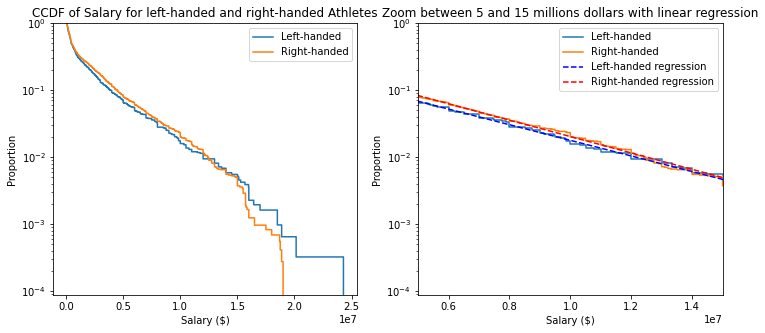

Left-handed athletes : y_L = -2.68e-07*x -1.35 (R^2 = 0.99524)
Right-handed athletes : y_R = -2.81e-07*x -1.08 (R^2 = 0.99561)


In [14]:
# Plot of the ecdf with seaborn
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns_L = sns.ecdfplot(df_L.salary, complementary=True)
sns_R = sns.ecdfplot(df_R.salary, complementary=True)
plt.figwidth = 50
plt.xlabel('Salary ($)')
plt.yscale('log')
plt.legend(labels = ['Left-handed','Right-handed'])
plt.title('CCDF of Salary for left-handed and right-handed Athletes')

## Linear regression on the salary CCDF to quantify the difference between left and right-handed players 

# Range of indices for the linear regression 
min_reg = 0.5e7
max_reg = 1.5e7

# Extraction of the plotted data 
sns_Lx = sns_L.get_lines()[0].get_xdata()
sns_Ly = sns_L.get_lines()[0].get_ydata()
sns_Rx = sns_R.get_lines()[1].get_xdata()
sns_Ry = sns_R.get_lines()[1].get_ydata()

Index_min_L = np.absolute(sns_Lx-min_reg).argmin()
Index_max_L = np.absolute(sns_Lx-max_reg).argmin()
Index_min_R = np.absolute(sns_Rx-min_reg).argmin()
Index_max_R = np.absolute(sns_Rx-max_reg).argmin()


# Linear regression for left-handed players 
lr_L = LinearRegression()
lr_L.fit(sns_Lx.reshape(-1,1)[Index_min_L:Index_max_L], np.log(sns_Ly + 1e-10)\
         .reshape(-1,1)[Index_min_L:Index_max_L])
a_L = lr_L.coef_[0]
b_L = lr_L.intercept_
R2_L = lr_L.score(sns_Lx.reshape(-1,1)[Index_min_L:Index_max_L], np.log(sns_Ly + 1e-10)\
                  .reshape(-1,1)[Index_min_L:Index_max_L])


# Linear regression for right-handed players 
lr_R = LinearRegression()
lr_R.fit(sns_Rx.reshape(-1,1)[Index_min_R:Index_max_R], np.log(sns_Ry + 1e-10)\
         .reshape(-1,1)[Index_min_R:Index_max_R])
a_R = lr_R.coef_[0]
b_R = lr_R.intercept_
R2_R = lr_R.score(sns_Rx.reshape(-1,1)[Index_min_R:Index_max_R], np.log(sns_Ry + 1e-10)\
                  .reshape(-1,1)[Index_min_R:Index_max_R])


# Plot of the results in semilog
plt.subplot(1,2,2)
sns_L = sns.ecdfplot(df_L.salary, complementary=True)
sns_R = sns.ecdfplot(df_R.salary, complementary=True)
plt.title('Zoom between 5 and 15 millions dollars with linear regression')
plt.yscale('log')
plt.plot(sns_Lx, np.exp(a_L*sns_Lx+b_L), color='blue', linestyle='--')
plt.plot(sns_Rx, np.exp(a_R*sns_Rx+b_R), color='red', linestyle='--')
plt.xlabel('Salary ($)')
plt.xlim([min_reg,max_reg])
# plt.ylabel('CCDF')
plt.legend(labels = ['Left-handed','Right-handed','Left-handed regression','Right-handed regression'])
plt.show()

# Linear regression results
print(f"Left-handed athletes : y_L = {round(a_L[0], 9)}*x {round(b_L[0], 2)} (R^2 = {round(R2_L, 5)})")
print(f"Right-handed athletes : y_R = {round(a_R[0], 9)}*x {round(b_R[0], 2)} (R^2 = {round(R2_R, 5)})")



Once plotted in semilog scale we can see that for salaries between $0.5\cdot 10^7$ and $1.5\cdot 10^7$ the log-distributions appear to be linear, this tells us that for both categories, the data can be considered to follow an exponential distribution rather than a power law distribution. In order to get a more quantitative feeling of this exponential distribution we computed and plotted on the right hand graph the linear regression aver those ranges. The closeness of the regression coefficients confirms that the two distributions are very close to each other so the salary distribution isn't really influenced by whether or not you're right-handed, it's mainly the absolute value that is.

It seems like for salaries below 13 million dollars, right-handed players are better paid than left-handed ones. But for salaries above to 13 million dollars, the trend is inversed.

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

It seems like for salaries below 13 million dollars, right-handed players are better paid than left-handed ones. But for salaries above to 13 million dollars, the trend is inversed. The lin-log plot reveals that the data, for both categories, can be considered to follow an exponential distribution rather than a power law distribution.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

The mean salary of left-handed pitchers is (1437232.86 ± 84589.62)$.
The mean salary of right-handed pitchers is (1597010.14 ± 57501.44)$.
The confidence intervals are given at the level of 95%.


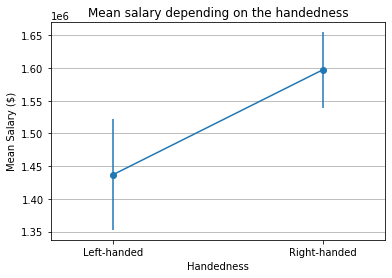

In [15]:
# Creation of dataframe containing salaries depending on the handedness
salary_df_L = df_L.salary.dropna()
salary_df_R = df_R.salary.dropna()

# Computation of statistics
z = 1.96 #z-score for the 95% confidence interval
mean_L = salary_df_L.mean()
ci_L = z*salary_df_L.sem(ddof=0) #ddof option to divide by N instead of N-1
mean_R = salary_df_R.mean()
ci_R = z*salary_df_R.sem(ddof=0)

# Print of salary statistics (rounded to the nearest cent)
print(f"The mean salary of left-handed pitchers is ({round(mean_L, 2)} ± {round(ci_L, 2)})$.\n"
      f"The mean salary of right-handed pitchers is ({round(mean_R, 2)} ± {round(ci_R, 2)})$.\n"
     "The confidence intervals are given at the level of 95%.")

# Plot of statistics
plt.errorbar(x=HANDEDNESS_LABEL,y=[mean_L,mean_R],yerr=[ci_L,ci_R],fmt='o-')
plt.grid(axis='y')
plt.xlim(-0.3,1.3)
plt.title("Mean salary depending on the handedness")
plt.xlabel('Handedness')
plt.ylabel('Mean Salary ($)')
plt.title("Mean salary depending on the handedness")
plt.show()

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

At the .05 level of significance, there seems to be a statistically significant difference between salary of right and left-handed pitchers. Indeed, the error bars that has been ploted do not overlap, so even the smallest mean salary of right-handed pitchers is still above the highest mean salary of left handed pitchers, with a high likelihood. We can conclude that right-handed pitchers seems to earn more.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [16]:
# T-test on salary distribution similarity
_, p_value = stt.ttest_ind(salary_df_L,salary_df_R)
print(f"P-value of the t-test: {round(p_value, 5)}")

if p_value < 0.05:
    if salary_df_L.mean() > salary_df_R.mean():
        print("Left-handed pitchers earn significantly more than right-handed pitchers.")
    else:
        print("Right-handed pitchers earn significantly more than left-handed pitchers.")
else:
    print("There is no significant difference in earnings between left-handed and right-handed pitchers.")

P-value of the t-test: 0.00261
Right-handed pitchers earn significantly more than left-handed pitchers.


**Interpretation of this t-test:**

- Null Hypothesis $H_0$: There is no significant difference between the mean salaries of left-handed and right-handed pitchers.
- Alternative Hypothesis $H_A$: There is a significant difference between the mean salaries of left-handed and right-handed pitchers.

The p-value is lower than 0.05, so the null hypothesis cannot accurately account for the data we have. We hence get weak indirect evidence that there is a significant difference between the mean salaries of leftand right-handed pitchers, and that **righties earn more.**

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [17]:
# Creation of dataframe containing the OBA for players that have G>=5
BA_df_R = df_R[df_R.G >= 5].BAOpp.dropna()
BA_df_L = df_L[df_L.G >= 5].BAOpp.dropna()

# T-test on OBA distribution similarity
_, p_value2 = stt.ttest_ind(BA_df_R,BA_df_L)

# Print of statistics (with a coherent number of significant digits)
print(f"The mean of OBA for left-handed pitchers is {round(BA_df_L.mean(), 5)}"
      f" ± {round(z*BA_df_L.sem(ddof=0), 5)},\n"
      f"and for right-handed pitchers is {round(BA_df_R.mean(), 5)} ± {round(z*BA_df_R.sem(ddof=0), 5)}.\n"
      f"The p-value of the statistic test is {round(p_value2, 5)}.")

The mean of OBA for left-handed pitchers is 0.27039 ± 0.00162,
and for right-handed pitchers is 0.26784 ± 0.00096.
The p-value of the statistic test is 0.00593.


**Interpretation of this t-test:**

- Null Hypothesis $H_0$: There is no significant difference between the mean opponents' batting average for left-handed and right-handed pitchers.
- Alternative Hypothesis $H_A$: There is a significant difference between the mean opponents' batting average for left-handed and right-handed pitchers.

The p-value is lower than 0.05, so the null hypothesis cannot accurately account for the data we have. We hence get weak indirect evidence that there is a significant difference between the mean opponents' batting average of leftand right-handed pitchers, and that **righties are better pitchers than lefties.**


# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [18]:
# Creation of left and right-handed dataframes for year 2000
df2000_L = df_L[df_L.yearID==2000].copy(deep=True)
df2000_R = df_R[df_R.yearID==2000].copy(deep=True)

# Creation of dataframes containing salaries for left and right-handed pitchers in 2000
salary2000_L = df2000_L.salary.dropna()
salary2000_R = df2000_R.salary.dropna()

# Print of salary statistics (rounded to the nearest cent)
print(f"The mean salary of left-handed pitchers is ({round(salary2000_L.mean(), 2)}"
      f" ± {round(z*salary2000_L.sem(ddof=0), 2)})$.\n"
      f"The mean salary of right-handed pitchers is ({round(salary2000_R.mean(), 2)}"
      f" ± {round(z*salary2000_R.sem(ddof=0), 2)})$.")

# T-test on the mean salaries between left and right-handed pitchers in 2000
_, p_value3 = stt.ttest_ind(salary2000_L,salary2000_R)
print(f"P-value: {p_value3.round(5)}")

The mean salary of left-handed pitchers is (1744753.84 ± 433155.1)$.
The mean salary of right-handed pitchers is (1839292.03 ± 259513.28)$.
P-value: 0.7129


**Interpretation of this t-test :**

- Null Hypothesis $H_0$: There is no significant difference between the mean salaries of left-handed and right-handed pitchers in 2000.
- Alternative Hypothesis $H_A$: There is a significant difference between the mean salaries of left-handed and right-handed pitchers in 2000.

The p-value exceeds 0.05, so we cannot reject the null hypothesis. Hence we cannot say whether there is a significant difference between left and right-handed pichter's salaries or not in 2000.

In [19]:
# Creation of dataframes containing the left and right-handed pitchers' OBA for year 2000
BA2000_L = df2000_L[df2000_L.G>=5].BAOpp.dropna()
BA2000_R = df2000_R[df2000_R.G>=5].BAOpp.dropna()

# T-test on the mean OBA between left and right-handed pitchers
_, p_value4 = stt.ttest_ind(BA2000_L,BA2000_R)

# Print of OBA statistics (with a coherent number of significant digits)
print(f"The mean of OBA for left-handed pitchers is {round(BA2000_L.mean(), 4)}"
      f" ± {round(z*BA2000_L.sem(ddof=0), 4)},\n"
      f"and for right-handed pitchers is {round(BA2000_R.mean(), 4)} ± {round(z*BA2000_R.sem(ddof=0), 4)}.\n"
      f"The p-value of the statistic test is {round(p_value4, 4)}.")

The mean of OBA for left-handed pitchers is 0.2774 ± 0.0098,
and for right-handed pitchers is 0.2765 ± 0.0045.
The p-value of the statistic test is 0.8586.


**Interpretation of this t-test :**

- Null Hypothesis $H_0$: There is no significant difference between the mean OBA of left and right-handed pitchers in 2000.
- Alternative Hypothesis $H_A$: There is a significant difference between the mean OBA of left and right-handed pitchers in 2000.

The p-value exceeds 0.05, so we cannot reject the null hypothesis. Hence we cannot say whether there is a significant difference between left and right-handed pichter's OBA or not in 2000.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

Percentage of left-handed pitchers in 2007: 28.16 %.
Mean salary in 2007: 2600513.74 $
Mean opponents' batting average in 2007: 0.279


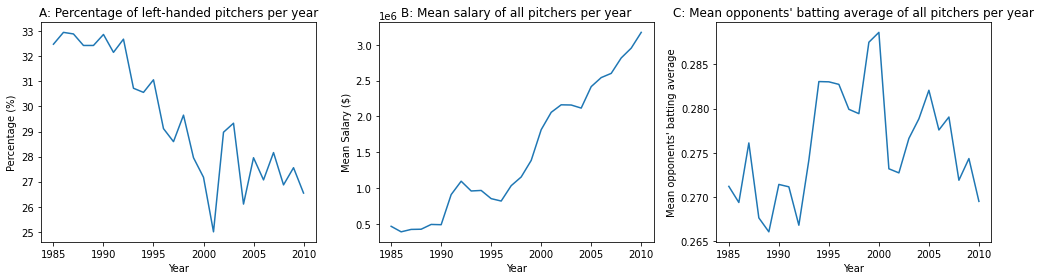

In [20]:
# Creation of dataframe containing the percentage of left-handed pitchers,
# mean salary by year and mean batting average by year
percentage_of_L = df_L.groupby('yearID').size() / df.groupby('yearID').size()*100
salary_mean = df.groupby('yearID').salary.mean()
BA_mean = df.groupby('yearID').BAOpp.mean()

# Plot of corresponding figures
fig, (A,B,C) = plt.subplots(1,3, figsize=(14, 4))

A.plot(percentage_of_L)
A.set_title('A: Percentage of left-handed pitchers per year')
A.set_xlabel('Year')
A.set_ylabel('Percentage (%)')

B.plot(salary_mean)
B.set_title("B: Mean salary of all pitchers per year")
B.set_xlabel("Year")
B.set_ylabel("Mean Salary ($)")

C.plot(BA_mean)
C.set_title("C: Mean opponents' batting average of all pitchers per year")
C.set_xlabel("Year")
C.set_ylabel("Mean opponents' batting average")

fig.tight_layout()

# Extraction of statistics for year 2007 (with two digits after the decimal point)
year = 2007
print(f"Percentage of left-handed pitchers in {year}: {round(percentage_of_L.loc[year], 2)} %.")
print(f"Mean salary in {year}: {round(salary_mean.loc[year], 2)} $")
print(f"Mean opponents' batting average in {year}: {round(BA_mean.loc[year], 3)}")

**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

Mean salary of left-handed pitchers in 1999: 1272792.28 $
Mean opponents' batting average of right-handed pitchers in 1999: 0.286


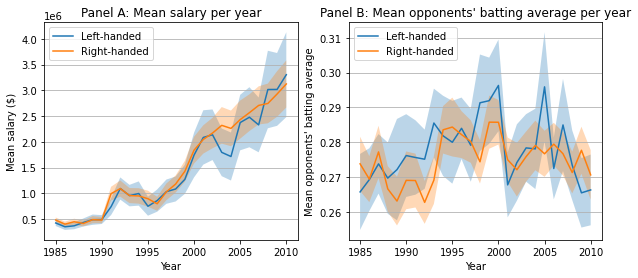

In [21]:
fig2, (A,B) = plt.subplots(1,2, figsize=(10,4))

#Plot of mean salary for left and right-handed pitchers across the years 
for name, group in df.groupby('throws'):
    salary_by_year = group.groupby('yearID').salary
    mean = salary_by_year.mean()
    ci = z*salary_by_year.sem(ddof=0)
    A.plot(mean.index, mean, label=HANDEDNESS_LABEL[DICT[name]])
    A.fill_between(mean.index, mean-ci, mean+ci, alpha=0.3)
A.set_title("Panel A: Mean salary per year")
A.set_xlabel("Year")
A.set_ylabel("Mean salary ($)")
A.legend(loc=2)
A.grid(axis='y')

#Plot of mean OBA for left and right-handed pitchers across the years 
for name, group in df.groupby('throws'):
    OBA_by_year = group.groupby('yearID').BAOpp
    mean = OBA_by_year.mean()
    ci = z*OBA_by_year.sem(ddof=0)
    B.plot(mean.index, mean, label=HANDEDNESS_LABEL[DICT[name]])
    B.fill_between(mean.index, mean-ci,mean+ci, alpha=0.3)
B.set_title("Panel B: Mean opponents' batting average per year")
B.set_xlabel("Year")
B.set_ylabel("Mean opponents' batting average")
B.legend(loc=2)
B.grid(axis='y')
fig.tight_layout()

#Print of statistics for year 1999 (with two digits after the decimal point)
year = 1999
print(f"Mean salary of left-handed pitchers in {year}: {df_L[df_L.yearID == year].salary.mean().round(2)} $")
print(f"Mean opponents' batting average of right-handed pitchers in {year}: "
      f"{df_R[df_R.yearID == year].BAOpp.mean().round(3)}")

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.2 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

The results obtained here are **in opposition** with Tasks 2.7 and 2.8: indeed, in part 2 we could say that salary and OBA were significantly different depending on the handedness.

In Task 3.1 however, we realized that these differences were not clear anymore in year 2000, and with plots of Task 3.3, lines are clearly entangled so we cannot conclude that there is a significant difference between salary and OBA distribution depending on the handedness over the years. 

The main difference between those two tasks is that tasks 2.7 and 2.8 relies on the micro-average treating equally all the datapoints whereas task 3.1 uses the macro-average by averaging over each year. It reminds us the Simpson's paradox, since in general, the difference seems significant, and considering data across years, this difference cannot be noticed.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


Fraction of left-handed pitchers with salary data missing in 2002: 0.382


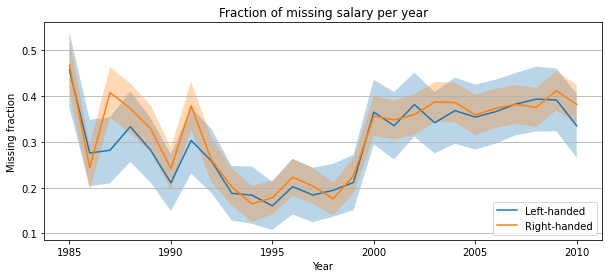

In [22]:
# Plot of missing salaries for left and right-handed pitchers per year
fig3, A = plt.subplots(1, figsize=(10,4))

for name, group in df.groupby('throws'):
    salary_by_year = group.groupby('yearID').salary
    missing_fraction = salary_by_year.apply(lambda x: x.isna().mean())
    ci = z*salary_by_year.apply(lambda x: x.isna().sem(ddof=0))
    A.plot(missing_fraction.index, missing_fraction, label=HANDEDNESS_LABEL[DICT[name]])
    A.fill_between(missing_fraction.index,missing_fraction-ci,missing_fraction+ci,alpha=0.3)
A.set_title('Fraction of missing salary per year')
A.set_xlabel('Year')
A.set_ylabel('Missing fraction')
A.legend(loc=4)
A.grid(axis='y')
fig.tight_layout()

# Print statistics for year 2002 (with two digits after the decimal point)
year = 2002
print(f"Fraction of left-handed pitchers with salary data missing in {year}:"
      f" {df_L[df_L.yearID == year].salary.isnull().mean().round(3)}")

Based on the above graph, since curves and their confidence intervals almost always overlap, there are not significantly more missing salaries for left-handed pitchers than for right-handed pitchers across years. Hence, it is not challenging our previous results.

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

We could have seen only a non-representative subset of right-handed pitchers salaries, for instace the poorer, and have a representative set of left-handed pitchers salaries, so we could have concluded that left handed pitchers earn more, but this is just due to the fact that we would have missed the richest right-handed pitchers. To avoid this, we should do bootstrap resampling.